<h1>ques1</h1>

In [2]:
!wget https://www.dropbox.com/s/8vptwyquvk9oppy/titanic.csv

--2022-07-28 09:22:47--  https://www.dropbox.com/s/8vptwyquvk9oppy/titanic.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/8vptwyquvk9oppy/titanic.csv [following]
--2022-07-28 09:22:47--  https://www.dropbox.com/s/raw/8vptwyquvk9oppy/titanic.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7529cc758724b8e7ef7192d787.dl.dropboxusercontent.com/cd/0/inline/Bp6pGGPhOMFsizD-nDdmRIwbfVlhcVGTGvjVT9-2nncyDl6TS-ypz-yqOs2dvvRhHc5oBmEcWdbcdeIsKjoLEd0aCN6E0A4NyCBPDD-lVKyiY1BZr7vqDgigFsXXAOJdGG4_o2QLG_eokOCQE4qhX1rXKjMOxlj4209BpkNSuW3Fyw/file# [following]
--2022-07-28 09:22:47--  https://uc7529cc758724b8e7ef7192d787.dl.dropboxusercontent.com/cd/0/inline/Bp6pGGPhOMFsizD-nDdmRIwbfVlhcVGTGvjVT9-2nncyDl6TS-ypz-yqOs2dvvRhHc5o

In [3]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [4]:
from sklearn.model_selection import KFold

In [5]:
from sklearn import tree

In [6]:
data1=pd.read_csv("titanic.csv")

In [7]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data1=data1.drop(columns="Cabin")
data1=data1.dropna()
data1.fillna(value=data1.Age.mean(),inplace=True)

In [10]:
data1=data1.drop(columns=["Name","Ticket"])

In [11]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [12]:
data1.shape

(712, 9)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Sex          712 non-null    object 
 4   Age          712 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Fare         712 non-null    float64
 8   Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 55.6+ KB


In [14]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
result = encoder.fit_transform(data1)

In [15]:
data1=pd.DataFrame(result,columns=data1.columns)

In [16]:
data1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,0.0,2.0,1.0,28.0,1.0,0.0,16.0,2.0
1,1.0,1.0,0.0,0.0,51.0,1.0,0.0,180.0,0.0
2,2.0,1.0,2.0,0.0,34.0,0.0,0.0,32.0,2.0
3,3.0,1.0,0.0,0.0,47.0,1.0,0.0,163.0,2.0
4,4.0,0.0,2.0,1.0,47.0,0.0,0.0,34.0,2.0
...,...,...,...,...,...,...,...,...,...
707,707.0,0.0,2.0,0.0,52.0,0.0,5.0,128.0,1.0
708,708.0,0.0,1.0,1.0,35.0,0.0,0.0,72.0,2.0
709,709.0,1.0,0.0,0.0,24.0,0.0,0.0,130.0,2.0
710,710.0,1.0,0.0,1.0,34.0,0.0,0.0,130.0,0.0


In [17]:
X=data1.drop(columns="Survived")
y=data1.Survived

In [18]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,2.0,1.0,28.0,1.0,0.0,16.0,2.0
1,1.0,0.0,0.0,51.0,1.0,0.0,180.0,0.0
2,2.0,2.0,0.0,34.0,0.0,0.0,32.0,2.0
3,3.0,0.0,0.0,47.0,1.0,0.0,163.0,2.0
4,4.0,2.0,1.0,47.0,0.0,0.0,34.0,2.0
...,...,...,...,...,...,...,...,...
707,707.0,2.0,0.0,52.0,0.0,5.0,128.0,1.0
708,708.0,1.0,1.0,35.0,0.0,0.0,72.0,2.0
709,709.0,0.0,0.0,24.0,0.0,0.0,130.0,2.0
710,710.0,0.0,1.0,34.0,0.0,0.0,130.0,0.0


In [19]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
707    0.0
708    0.0
709    1.0
710    1.0
711    0.0
Name: Survived, Length: 712, dtype: float64

In [20]:
model = tree.DecisionTreeClassifier()


In [21]:
kf = KFold(n_splits=5)
# len(kf)
print(kf)  
for train_index, test_index in kf.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  model = model.fit(X_train, y_train)
  predicted_value = model.predict(X_test)
  print("accuracy fold =",accuracy_score(y_test,predicted_value))



KFold(n_splits=5, random_state=None, shuffle=False)
accuracy fold = 0.5664335664335665
accuracy fold = 0.5804195804195804
accuracy fold = 0.7676056338028169
accuracy fold = 0.7746478873239436
accuracy fold = 0.7887323943661971


In [22]:
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix
 
model = model.fit(X_train, y_train)
predicted_value = model.predict(X_test)
results = confusion_matrix(y_test, predicted_value)

[[70 17]
 [12 43]]


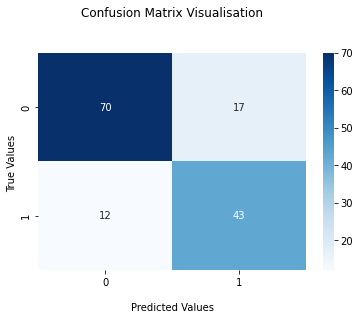

In [23]:
import seaborn as sns

ax = sns.heatmap(results, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix Visualisation\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('True Values ');

print(results)
## Display the visualization of the Confusion Matrix.
plt.show()

<h1>ques 2</h1>

In [24]:
!wget https://www.dropbox.com/s/ej04t8olwkgvztf/Breast_Cancer_Dataset.csv

--2022-07-28 09:22:50--  https://www.dropbox.com/s/ej04t8olwkgvztf/Breast_Cancer_Dataset.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ej04t8olwkgvztf/Breast_Cancer_Dataset.csv [following]
--2022-07-28 09:22:50--  https://www.dropbox.com/s/raw/ej04t8olwkgvztf/Breast_Cancer_Dataset.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8de02c3490ece1263c34bd5c3b.dl.dropboxusercontent.com/cd/0/inline/Bp6EvFHMV1aRihDg62VlwQdw8KvI7cnddgXFcHYIJrB39Y7K3bDKTV9f4oLuWNr9XnKnM-KKvSofH5JNhh0V5l8QnDTI-Ja4Uh8pbNoeY5Eq-63OUsp007mcgwnxX_coA93n5Q38-osmMm_3PP-80C5vhR35wGZ5-cnYs3p-wGUW0g/file# [following]
--2022-07-28 09:22:50--  https://uc8de02c3490ece1263c34bd5c3b.dl.dropboxusercontent.com/cd/0/inline/Bp6EvFHMV1aRihDg62VlwQdw8K

In [25]:
data2=pd.read_csv("Breast_Cancer_Dataset.csv")

In [26]:
data2

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [27]:
data2.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [28]:
data2=data2.drop(columns="Unnamed: 32")

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [30]:
data2["diagnosis"]=pd.Series(labelencoder.fit_transform(data2["diagnosis"]))

In [31]:
X=data2.drop(columns="diagnosis")
y=data2.diagnosis

In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred=clf.predict(X_test)
accuracy_score(y_test,pred)

0.631578947368421

In [36]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,y_pred)

0.6374269005847953

In [37]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)
pred=classifier.predict(X_test)
accuracy_score(y_test,pred)

0.9532163742690059

In [38]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)
pred=classifier.predict(X_test)
accuracy_score(y_test,pred) 

0.7134502923976608

In [39]:
classifier = SVC(random_state=0)  
classifier.fit(X_train, y_train)
pred=classifier.predict(X_test)
accuracy_score(y_test,pred)

0.631578947368421

In [40]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, y_train)
pred=classifier.predict(X_test)
accuracy_score(y_test,pred)

0.9707602339181286

In [41]:

y_proba = classifier.predict_proba(X_test)

In [42]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ROC AUC score=0.995


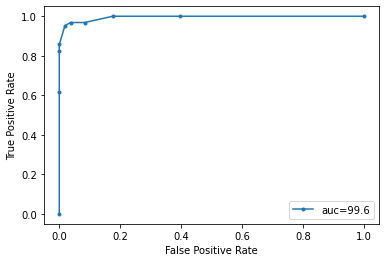

In [43]:
lr_probs = y_proba[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('ROC AUC score=%.3f' % (lr_auc))
# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='auc=99.6')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [44]:
from sklearn.metrics import f1_score

In [45]:
f1_score(y_test,pred)

0.96

In [46]:
from sklearn.metrics import classification_report

In [47]:
target_names = ["0","1"]
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



<h1>ques 3</h1>

In [48]:
!wget https://www.dropbox.com/s/25lwuo16ij3s6dk/voice.csv

--2022-07-28 09:22:52--  https://www.dropbox.com/s/25lwuo16ij3s6dk/voice.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/25lwuo16ij3s6dk/voice.csv [following]
--2022-07-28 09:22:52--  https://www.dropbox.com/s/raw/25lwuo16ij3s6dk/voice.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucecb303fa031f5629b8f22f48de.dl.dropboxusercontent.com/cd/0/inline/Bp4jmQ51C9bOHxMZiKI1oueeQYV9TGK01IDFXWxAOZNiV9G6MPBAEE7hmtXPge66zq7m0iEnxJ3dwF_z1shuU3Zccdz6b2BLFR81ivBkhvyyesgMukgFybQLhKNAsTNrWZl9SqxKfBtWKqIRf4Wkck49sz6yj6IY613lj_-dcHnGEw/file# [following]
--2022-07-28 09:22:52--  https://ucecb303fa031f5629b8f22f48de.dl.dropboxusercontent.com/cd/0/inline/Bp4jmQ51C9bOHxMZiKI1oueeQYV9TGK01IDFXWxAOZNiV9G6MPBAEE7hmtXPge66zq7m0iEnxJ

In [49]:
data3=pd.read_csv("voice.csv")

In [50]:
data3

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [51]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [52]:
data3["Gender_Identified"]=data3.label

In [53]:
data3=data3.drop(columns="label")

In [54]:
data3


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Gender_Identified
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [146]:
data3["Gender_Identified"]=pd.Series(labelencoder.fit_transform(data3["Gender_Identified"]))

In [154]:
data3

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Gender_Identified
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [147]:
X=data3.drop(columns="Gender_Identified")
y=data3.Gender_Identified

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [149]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() #sc = standard scaler variable 
x_train = sc.fit_transform(X_train)#only apply feature scaling to numerical values 
x_test = sc.transform(X_test)

In [150]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier()  

In [151]:
from sklearn.model_selection import GridSearchCV
import numpy as np


In [87]:
params = {'n_estimators':range(10,150,10),
        'criterion':["gini", "entropy", "log_loss"],
          "max_depth": range(2,10)
          }

In [88]:
grid = GridSearchCV(estimator=classifier,
                    param_grid=params,
                    scoring='accuracy')

In [89]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
560 fits failed out of a total of 1680.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
560 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 10),
                         'n_estimators': range(10, 150, 10)},
             scoring='accuracy')

In [90]:
grid.best_score_

0.9819585951640126

In [91]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 140}

In [92]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=140)

<h1>ques 4</h1>

In [93]:
!wget https://www.dropbox.com/s/hdrch5zo1wywgsb/seeds.csv

--2022-07-28 10:17:27--  https://www.dropbox.com/s/hdrch5zo1wywgsb/seeds.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hdrch5zo1wywgsb/seeds.csv [following]
--2022-07-28 10:17:27--  https://www.dropbox.com/s/raw/hdrch5zo1wywgsb/seeds.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4b8feea2c5b0a10bf3814362aa.dl.dropboxusercontent.com/cd/0/inline/Bp73zEyEiXvas2qROTufR0tjVKg1AgPtZQqQlZ8leXg4E79uedXZQ-LElDUnwLPtXZyYfC6zMgj86McFAbOcC3O82p2Vi15L5kh6lrrJI7DuITwtEYPSvkB_z7OfO2yB7byx2jEyfjn_H8NmmvMxdGDBbpMlgItj5vcE2luO-fFaSg/file# [following]
--2022-07-28 10:17:28--  https://uc4b8feea2c5b0a10bf3814362aa.dl.dropboxusercontent.com/cd/0/inline/Bp73zEyEiXvas2qROTufR0tjVKg1AgPtZQqQlZ8leXg4E79uedXZQ-LElDUnwLPtXZyYfC6zMgj

In [94]:
data4=pd.read_csv("seeds.csv")

In [95]:
data4

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [101]:
data4.Type.unique()

array([1, 2, 3])

In [113]:
a=[]
a1=0
a2=0
a3=0
for i in data4.Type:
  if i==1:
    a1+=1
  elif i==2:
    a2+=1
  else:
    a3+=1
a.append([a1,a1/len(data4.Type)])
a.append([a2,a2/len(data4.Type)])
a.append([a3,a3/len(data4.Type)])

In [117]:
new=pd.DataFrame(a,columns=["Counts","Percentage"],index=[1,2,3])

In [118]:
new

,Counts,Percentage
1,66,0.331658
2,68,0.341709
3,65,0.326633


In [119]:
X=data4.drop(columns="Type")
y=data4.Type

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=12)

In [143]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)
decision_tree=accuracy_score(y_test,y_pred)

In [136]:
gb=GaussianNB()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
Gussian_NB=accuracy_score(y_test,y_pred)

In [137]:
from sklearn.ensemble import AdaBoostClassifier

In [139]:
ada = AdaBoostClassifier(base_estimator=tree,n_estimators=50)
ada.fit(X_train,y_train)
pred = ada.predict(X_test)
ADA_boost_decision_tree=accuracy_score(y_test,pred)

In [140]:
ada = AdaBoostClassifier(base_estimator=gb,n_estimators=50,)
ada.fit(X_train,y_train)
pred = ada.predict(X_test)
ADA_boost_Gussian_NB=accuracy_score(y_test,pred)

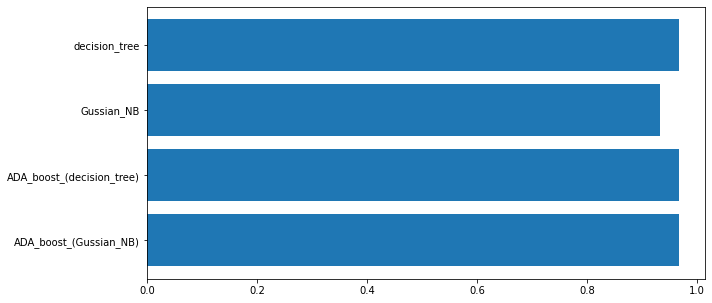

In [145]:
data={"ADA_boost_(Gussian_NB)":ADA_boost_Gussian_NB,"ADA_boost_(decision_tree)":ADA_boost_decision_tree,"Gussian_NB":Gussian_NB,"decision_tree":decision_tree}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize=(10, 5))
  
# creating the bar plot
plt.barh(courses, values)
plt.show()